# Week 11 Homework

##### 1.	What scale of measurement applies to timeseries data? 


Timeseries data uses an interval scale of measurement because the data is measured at a fixed interval and ratios do not make sense.

##### Is timeseries data continuous or discrete? Why?

Timeseries data is continuous in the mathematical sense, because each measurement taken at each new point in time is a continuation from the previous point on a graph of the data.  For example the temperature doesn't jump from one degree to the next.  It follows a continuous path of infinite real values between the two integer degree measures.  

However, in my researching this question I found some claims that timeseries data can be considered discrete as well.  Apparently the statistical definition of discrete timeseries data is data that has an interval greater than one second between observations. If the interval is one second or less, the timeseries data is considered continuous.

##### 2.	What does ARIMA stand for? Break down and explain each piece in the name.


ARIMA stands for Autoregressive Integrated Moving Average.  'AR' stands for 'autoregression,' which means that the regression model is based on the variable's prior values.  'I' stands for 'integrated,' and refers to the differencing of data values by replacing them with the difference between current and prior values.  And finally, 'MA' stands for 'moving average,' which considers an average that is continually calculated and recalculated over a set period of time in the past, like the average of a data point over the last 30 days, for example.

##### 3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale.


In [19]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Change index to datetime during import
temp = pd.read_csv('temperature.csv', index_col='datetime', parse_dates=True)

In [4]:
# Create function to convert kelvin to fahrenheit
def keltofahr(t):
    t = t * 1.8 - 459.67
    return t

In [5]:
# Apply the keltofahr function to the temp matrix elementwise, ignoring any NaNs
fahrtemp = temp.applymap(keltofahr, na_action='ignore')
fahrtemp.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,52.628000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,52.623150,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,52.609852,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,52.596554,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


##### 4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [34]:
# Use linear interpolation to fill in any missing values within the dataframe
def filler(M):
    M.interpolate()
    return M

In [42]:
# I wish I knew of a way to check the effectiveness of my function.  The dataframe is so large that I can't find any missing
# values other than those at the beginning and end of the columns.  :(

# Apply the filler function to the temp matrix
ffahrtemp=filler(fahrtemp)
ffahrtemp.head()

# Check for any remaining NaNs

Vancouver            1
Portland             1
San Francisco        1
Seattle              1
Los Angeles          1
San Diego            1
Las Vegas            1
Phoenix              1
Albuquerque          1
Denver               1
San Antonio          1
Dallas               1
Houston              1
Kansas City          1
Minneapolis          1
Saint Louis          1
Chicago              1
Nashville            1
Indianapolis         1
Atlanta              1
Detroit              1
Jacksonville         1
Charlotte            1
Miami                1
Pittsburgh           1
Toronto              1
Philadelphia         1
New York             1
Montreal             1
Boston               1
Beersheba            1
Tel Aviv District    1
Eilat                0
Haifa                1
Nahariyya            1
Jerusalem            1
Month                0
dtype: int64

##### 5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [8]:
# Add a month column to the temp dataframe
ffahrtemp['Month'] = pd.DatetimeIndex(ffahrtemp.index).month

# Specify summer and winter months in lists
summer = [6,7,8]
winter = [1,2,12]

# Use summer and winter lists to extract summer and winter data from temp dataframe
winter_data = ffahrtemp.loc[ffahrtemp['Month'].isin(winter)==True]
summer_data = ffahrtemp.loc[ffahrtemp['Month'].isin(summer)==True]

# Remove month column
del winter_data['Month']
del summer_data['Month']

winter_data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,50.000,46.598,60.548,51.188,61.682,64.472,66.776,72.176,51.116,55.130,...,34.124,38.102,22.568,37.580,57.992,57.200,58.820,67.676,67.676,60.854
2012-12-01 01:00:00,49.550,45.410,60.836,50.180,61.466,63.302,65.138,69.494,45.986,51.440,...,32.378,37.994,20.732,37.670,57.992,55.400,53.600,67.676,67.676,60.854
2012-12-01 02:00:00,49.730,45.014,60.530,49.964,61.466,62.546,64.652,65.120,42.710,49.028,...,30.884,37.166,19.598,37.292,57.002,55.400,56.183,67.676,67.676,60.854
2012-12-01 03:00:00,49.262,44.492,59.846,49.190,61.394,61.376,63.914,63.590,46.382,44.744,...,30.200,36.608,16.502,37.760,57.002,57.272,58.766,67.676,67.676,60.854
2012-12-01 04:00:00,49.154,44.888,60.386,48.614,61.538,60.458,62.672,59.936,42.206,40.568,...,30.110,35.996,13.496,37.526,55.994,57.848,58.163,67.676,67.676,60.854


In [9]:
summer_data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,57.722,60.152,70.448,58.874,77.648,71.366,97.8080,97.628,84.560,67.010,...,85.694,85.370,81.158,82.256,66.11,70.178,71.600,71.87,57.992,63.104
2013-06-01 01:00:00,56.444,58.604,69.278,57.902,76.172,69.890,96.5840,96.962,83.246,65.876,...,82.148,82.256,77.684,77.720,66.11,69.314,71.600,71.87,57.002,63.104
2013-06-01 02:00:00,55.562,58.154,67.190,57.200,73.544,67.064,86.5805,94.910,81.536,62.762,...,79.556,79.250,74.912,74.714,66.11,69.998,69.800,71.87,57.992,61.898
2013-06-01 03:00:00,55.094,57.434,64.310,56.174,70.394,64.256,93.9020,92.570,79.250,59.000,...,77.000,77.594,73.184,71.942,74.21,69.458,79.880,73.31,62.996,61.952
2013-06-01 04:00:00,53.600,55.652,61.826,54.770,67.784,61.790,91.2740,89.708,75.326,56.354,...,75.110,76.550,72.680,70.592,74.21,70.646,85.028,73.31,64.004,62.006


In [10]:
# find mean temps for winter months and summer months
winter_means = winter_data.mean()
summer_means = summer_data.mean()

# Merge winter and summer data into one dataframe
means=pd.concat([winter_means, summer_means], axis=1)
# Rename columns
means.columns = ["winter_mean", "summer_mean"]
means.head()

,winter_mean,summer_mean
Vancouver,38.748166,64.622928
Portland,40.119139,67.118982
San Francisco,51.236367,65.729965
Seattle,40.737672,64.747154
Los Angeles,54.785048,72.454255


In [11]:
# Create empty lists to store City A and City B lists as they are generated
i_list = []
j_list = []
for i in range(len(means)):
    for j in range(len(means)):
        if means.iloc[i]['winter_mean']<means.iloc[j]['winter_mean'] and means.iloc[i]['summer_mean']>means.iloc[j]['summer_mean']:
            i_list.append(means.index[i])
            j_list.append(means.index[j])

# Create dataframe from two generated lists
cities = pd.DataFrame(list(zip(i_list, j_list)),
               columns =['City A', 'City B'])

cities

,City A,City B
0,Portland,San Francisco
1,Portland,Seattle
2,Las Vegas,San Francisco
3,Las Vegas,Los Angeles
4,Las Vegas,San Diego
...,...,...
162,Tel Aviv District,Nahariyya
163,Eilat,Jacksonville
164,Eilat,Miami
165,Eilat,Haifa


##### 6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual. Explain why you chose the approach you did. 


In [12]:
# I chose to use rolling averages.  Because of the nature of the conditions to be met in question 5, a graph that shows the more
# extreme temperatures of Las Vegas would be best.  Since rolling average takes into account past and current errors, it has the
# effect of smoothing out the extremes in the data to give a truer picture of the overall pattern. Las Vegas' more extreme
# temperatures are visualized easily by the increased amplitude of the Las Vegas graph as it is compared to the Los Angeles 
# graph.

In [13]:
lv=ffahrtemp['Las Vegas'].tolist()
la=ffahrtemp['Los Angeles'].tolist()

city_roll = pd.DataFrame(list(zip(lv, la)),
               columns =['Las Vegas Temps', 'Los Angeles Temps'])

city_roll

,Las Vegas Temps,Los Angeles Temps
0,NaN,NaN
1,68.468000,65.696000
2,68.455654,65.692734
3,68.435919,65.683120
4,68.416183,65.673506
...,...,...
45248,61.502000,68.720000
45249,63.428000,72.554000
45250,64.742000,73.058000
45251,66.200000,72.500000


In [14]:
city_roll[ '7day_rolling_avg_lv' ] = city_roll['Las Vegas Temps'].rolling( 7).mean()
city_roll[ '7day_rolling_avg_la' ] = city_roll['Los Angeles Temps'].rolling( 7).mean()
city_roll.head()

,Las Vegas Temps,Los Angeles Temps,7day_rolling_avg_lv,7day_rolling_avg_la
0,NaN,NaN,NaN,NaN
1,68.468000,65.696000,NaN,NaN
2,68.455654,65.692734,NaN,NaN
3,68.435919,65.683120,NaN,NaN
4,68.416183,65.673506,NaN,NaN


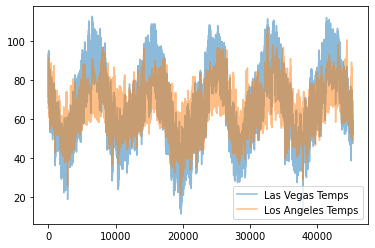

In [15]:
plt.plot(city_roll[['7day_rolling_avg_lv', '7day_rolling_avg_la']], alpha=0.5)
plt.legend(['Las Vegas Temps', 'Los Angeles Temps'])

##### 7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.


Seattle


C:\Users\jmortensen\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\jmortensen\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


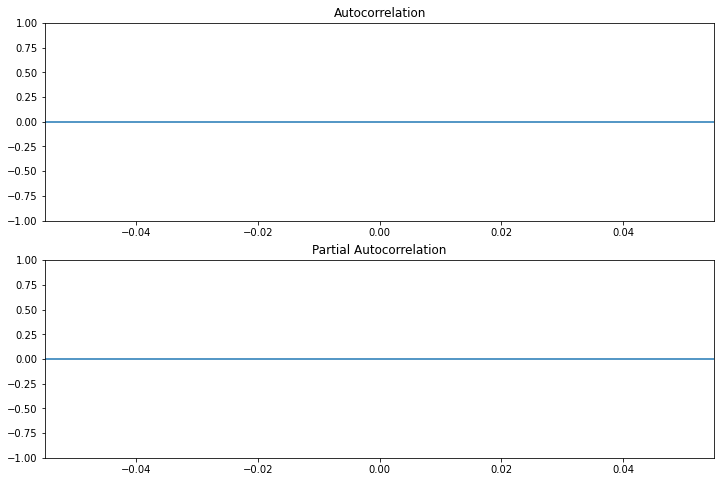

Albequerque


KeyError: 'Albequerque'

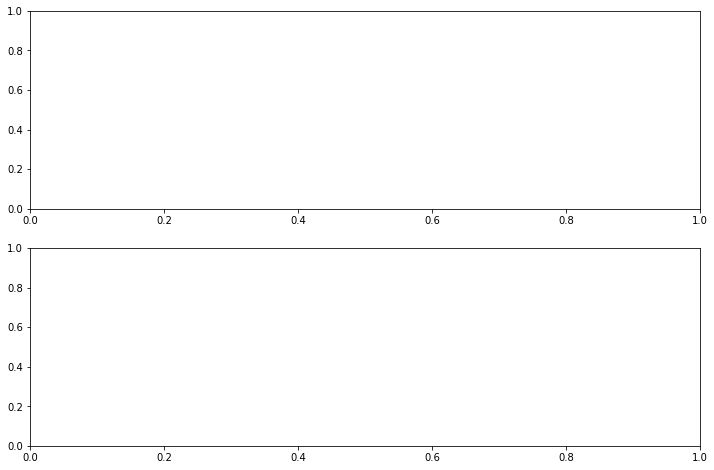

In [25]:
city_list = ['Seattle', 'Albequerque', 'Denver', 'Kansas City', 'Charlotte']


for city in city_list:
    print(city)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
    plot_acf(ffahrtemp[city], lags=10, zero=False, ax=ax1)
    plot_pacf(ffahrtemp[city], lags=10, zero=False, ax=ax2, method='ywm')
    plt.show()

#for city in city_list:
#    print(city)
#    model = SARIMAX(data = ffahrtemp[city], order = , seasonal_order = )
#    model_fit = model.fit()
    

#### a.	Graph the results


##### Bonus:  
What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.


GARCH stands for 'Generalized Autoregressive Conditional Heteroskedasticity,' whereas ARCH is simply 'Autoregressive Conditional Heteroskedasticity.'  As mentioned in question 2, 'AR' is for autoregression.  'C' is for 'Conditional,' and means that the variance is based on past errors.  'H' is for 'Heteroskedasticity,' which is my new favorite word.  My goal is to use it at least five times in various gatherings over the holidays.  ;)  Heteroskedasticity means that the variance in error is not consistent over the series...therefore it's volatile.  In other words, the variance varies.  Autoregressive models like ARMA, ARIMA, and SARIMA do not account for changes in the variance over time.  Instead, they assume homoskedasticity (my OTHER favorite new word), where the variance is constant and predictable.  ARCH and GARCH models take heteroskedasticity into account, and are particularly useful in finance.

The ARCH model makes the assumption that the variance can be forecasted based on the weighted average of the squares of the expected value of all of the error terms over a recent span of time.  The generalized version of this ARCH model (a.k.a. 'GARCH,' asserts that the best way to forecast variance is with the long run average variance, the variance that is predicted for the current time span, and the new information found in the most recent squared expected value of the error terms.

# DataCamp

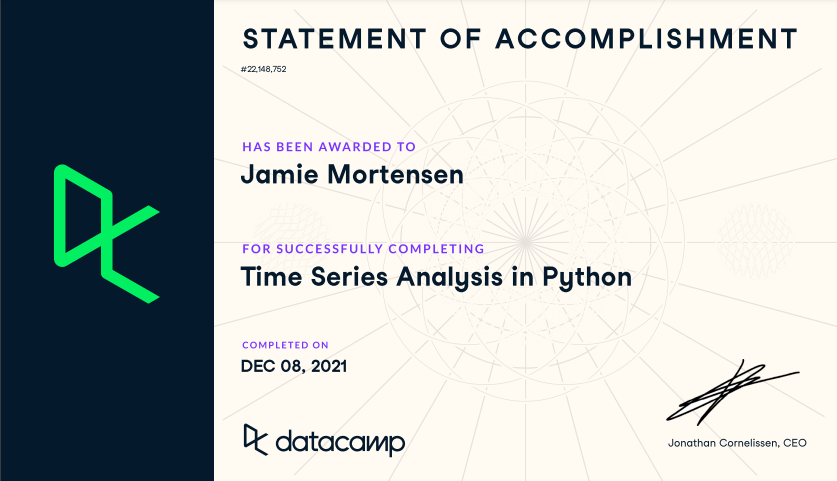